# 2023-05-12_11:19:14 EXP GALICIA

In [8]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop
from getexperimentdata import get_cam2_to_front, get_setting_vars, rowscols_2_platedistribution, plate_distribution_dict, experiment_results
from postprocessing import detail2class

# Experiment dir
experiment_dir = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-05-12_11:19:14 EXP GALICIA'

# Hardcoded plate_distribution
rows = ["C2", "C2", "C2", "C5", "C5", "C5","",""]
cols = ["LAS","TRA","LUX","RHL","CQSS ARA", "CQSS", "AHY","CEP","CVI","RSTA/B 1", "RSTA/B 2", ""]
plate_distribution = rowscols_2_platedistribution(rows,cols)
replicas_array = np.vstack((np.repeat('1',12), np.repeat('2',12), np.repeat('3',12), np.repeat('1',12),  np.repeat('2',12), np.repeat('3',12),  np.repeat('',12), np.repeat('',12)))
plate_distribution = np.char.add(plate_distribution,replicas_array)
# plate_distribution[6,11]='AIGUA+MEDI'

In [4]:
pd.DataFrame(plate_distribution)

,0,1,2,3,4,5,6,7,8,9,10,11
0,C2+LAS+1,C2+TRA+1,C2+LUX+1,C2+RHL+1,C2+CQSS ARA+1,C2+CQSS+1,C2+AHY+1,C2+CEP+1,C2+CVI+1,C2+RSTA/B 1+1,C2+RSTA/B 2+1,++1
1,C2+LAS+2,C2+TRA+2,C2+LUX+2,C2+RHL+2,C2+CQSS ARA+2,C2+CQSS+2,C2+AHY+2,C2+CEP+2,C2+CVI+2,C2+RSTA/B 1+2,C2+RSTA/B 2+2,++2
2,C2+LAS+3,C2+TRA+3,C2+LUX+3,C2+RHL+3,C2+CQSS ARA+3,C2+CQSS+3,C2+AHY+3,C2+CEP+3,C2+CVI+3,C2+RSTA/B 1+3,C2+RSTA/B 2+3,++3
3,C5+LAS+1,C5+TRA+1,C5+LUX+1,C5+RHL+1,C5+CQSS ARA+1,C5+CQSS+1,C5+AHY+1,C5+CEP+1,C5+CVI+1,C5+RSTA/B 1+1,C5+RSTA/B 2+1,++1
4,C5+LAS+2,C5+TRA+2,C5+LUX+2,C5+RHL+2,C5+CQSS ARA+2,C5+CQSS+2,C5+AHY+2,C5+CEP+2,C5+CVI+2,C5+RSTA/B 1+2,C5+RSTA/B 2+2,++2
5,C5+LAS+3,C5+TRA+3,C5+LUX+3,C5+RHL+3,C5+CQSS ARA+3,C5+CQSS+3,C5+AHY+3,C5+CEP+3,C5+CVI+3,C5+RSTA/B 1+3,C5+RSTA/B 2+3,++3
6,++,++,++,++,++,++,++,++,++,++,++,++
7,++,++,++,++,++,++,++,++,++,++,++,++


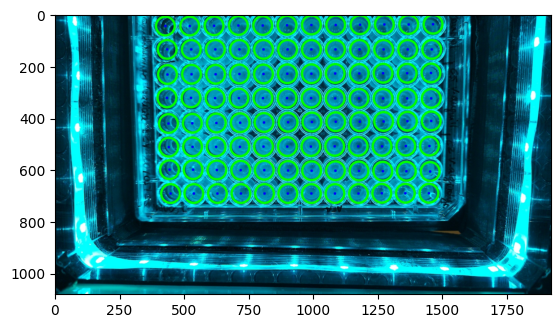

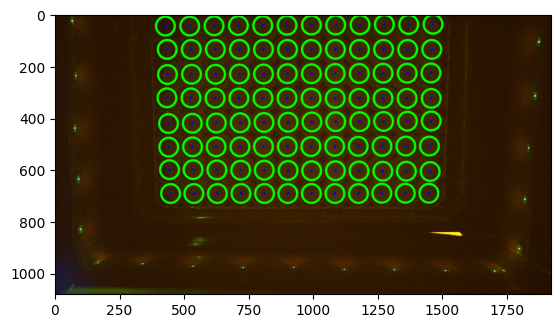

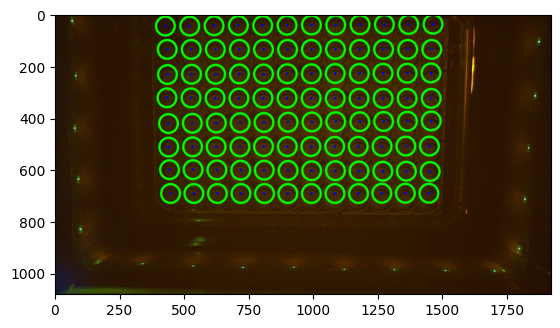

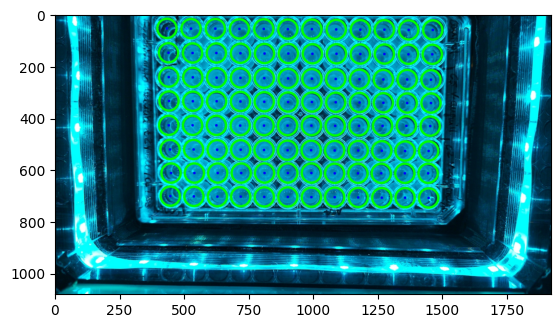

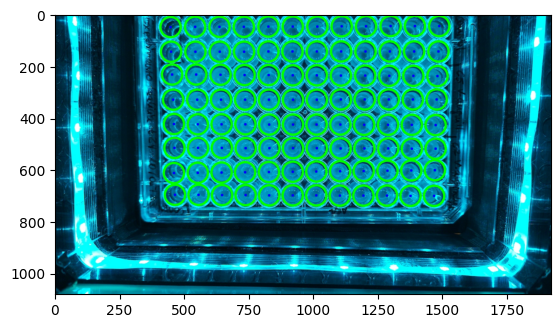

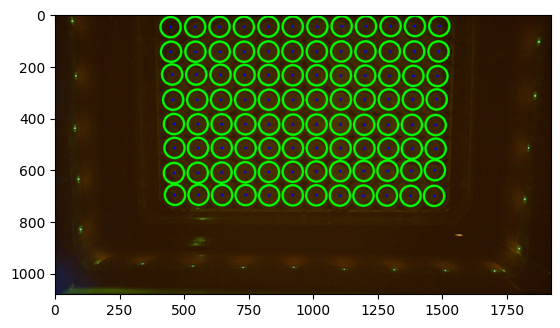

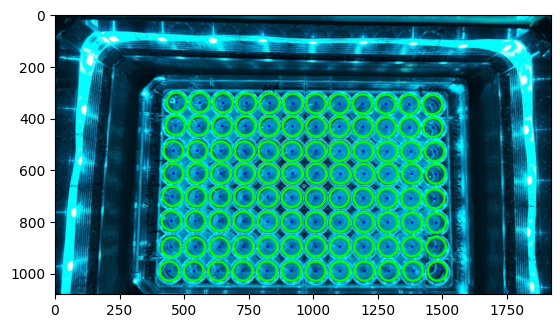

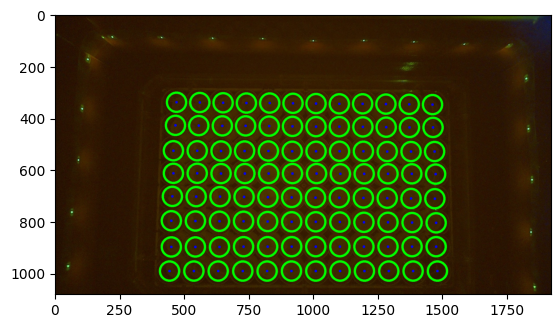

,InputType,InputConcentration,Date,Time,Plate,Replica,InputName,ReporterName,od,gfp
0,Patogen,10M5,2023-05-12,11:24:44,3,1,C2,LAS,99,27
1,Patogen,10M5,2023-05-12,11:24:44,3,1,C2,TRA,157,38
2,Patogen,10M5,2023-05-12,11:24:44,3,1,C2,LUX,151,38
3,Patogen,10M5,2023-05-12,11:24:44,3,1,C2,RHL,152,38
4,Patogen,10M5,2023-05-12,11:24:44,3,1,C2,CQSS ARA,152,39
...,...,...,...,...,...,...,...,...,...,...
343,Patogen,10M5,2023-05-12,11:22:45,1,2,C5,CEP,179,48
344,Patogen,10M5,2023-05-12,11:22:45,1,2,C5,CVI,177,46
345,Patogen,10M5,2023-05-12,11:22:45,1,2,C5,RSTA/B 1,180,45
346,Patogen,10M5,2023-05-12,11:22:45,1,2,C5,RSTA/B 2,181,45


In [6]:
table4detail = experiment_results(experiment_dir, plate_distribution)
table4detail.head(-10)

In [9]:
# Filter PLATE1 (as in this case the plate is repeated)
table4detail = table4detail[table4detail['Plate']=='1']
table4class = detail2class(table4detail)
table4class

ReporterName,LAS,TRA,LUX,RHL,CQSS ARA,CQSS,AHY,CEP,CVI,RSTA/B 1,RSTA/B 2,Replica,InputName,InputConcentration
gfp,40,43,43,45,49,44,43,44,44,43,42,1,C2,10M5
gfp,43,48,48,50,55,51,49,49,48,47,45,1,C5,10M5
gfp,42,45,48,49,52,48,46,48,46,45,44,2,C2,10M5
gfp,44,47,48,50,56,51,48,48,46,45,45,2,C5,10M5
gfp,43,46,47,48,54,48,47,49,47,48,45,3,C2,10M5
gfp,41,45,46,49,53,49,45,45,45,44,44,3,C5,10M5


In [10]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
table4class.to_csv(os.path.join(experiment_dir, 'output_df.csv'), index=False)

## Analysis

In [10]:
control_df = output_df[output_df['InputName']=='AIGUA']
non_control_df = output_df[output_df['InputName']!='AIGUA']

In [11]:
control_df

,InputType,InputConcentration,Replica,Date,Time,Plate,InputName,ReporterName,od,gfp
83,Patogen,10M5,1,2023-05-12,11:24:44,3,AIGUA,MEDI,174,43
179,Patogen,10M5,1,2023-05-12,11:25:46,4,AIGUA,MEDI,176,43
275,Patogen,10M5,1,2023-05-12,11:23:45,2,AIGUA,MEDI,173,42
371,Patogen,10M5,1,2023-05-12,11:22:45,1,AIGUA,MEDI,173,43


In [12]:
control_df['od'].values

array([174, 176, 173, 173])

### PLATE1

In [ ]:
non_control_df = non_control_df[non_control_df['Plate']=='1']
control_df = control_df[control_df['Plate']=='1']

grouped = non_control_df.groupby(['InputName','ReporterName'])

gal_exp_res = pd.DataFrame(grouped[['gfp','od']].mean())
#gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'] - control_df['gfp'].values)/(gal_exp_res['od'] - control_df['od'].values)
gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'] - control_df['gfp'].values)/(gal_exp_res['od'] - [150])

#gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'])/(gal_exp_res['od'])

C2_responses = gal_exp_res['fluo_per_cell'].loc['C2'].reset_index()
C5_responses = gal_exp_res['fluo_per_cell'].loc['C5'].reset_index()

In [ ]:
non_control_df[non_control_df['ReporterName']=='LAS']

#### Resultats
* Les resposetes de C2 són blaves.
* Les respostes de C5 son taronges.

In [ ]:
plt.bar(C2_responses['ReporterName'], C2_responses['fluo_per_cell'], color='blue')
plt.bar(C5_responses['ReporterName'], C5_responses['fluo_per_cell'], color='orange')
plt.show()

### PLATE2

In [ ]:
control_df = output_df[output_df['InputName']=='AIGUA']
non_control_df = output_df[output_df['InputName']!='AIGUA']

non_control_df = non_control_df[non_control_df['Plate']=='2']
control_df = control_df[control_df['Plate']=='2']

grouped = non_control_df.groupby(['InputName','ReporterName'])

gal_exp_res = pd.DataFrame(grouped[['gfp','od']].mean())
gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'] - control_df['gfp'].values)/(gal_exp_res['od'] - control_df['od'].values)

C2_responses = gal_exp_res['fluo_per_cell'].loc['C2'].reset_index()
C5_responses = gal_exp_res['fluo_per_cell'].loc['C5'].reset_index()

#### Resultats
* Les resposetes de C2 són blaves.
* Les respostes de C5 son taronges.

In [ ]:
plt.bar(C2_responses['ReporterName'], C2_responses['fluo_per_cell'], color='blue')
plt.bar(C5_responses['ReporterName'], C5_responses['fluo_per_cell'], color='orange')
plt.show()

### PLATE3

In [ ]:
control_df = output_df[output_df['InputName']=='AIGUA']
non_control_df = output_df[output_df['InputName']!='AIGUA']

non_control_df = non_control_df[non_control_df['Plate']=='3']
control_df = control_df[control_df['Plate']=='3']

grouped = non_control_df.groupby(['InputName','ReporterName'])

gal_exp_res = pd.DataFrame(grouped[['gfp','od']].mean())
gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'] - control_df['gfp'].values)/(gal_exp_res['od'] - control_df['od'].values)

C2_responses = gal_exp_res['fluo_per_cell'].loc['C2'].reset_index()
C5_responses = gal_exp_res['fluo_per_cell'].loc['C5'].reset_index()

#### Resultats
* Les resposetes de C2 són blaves.
* Les respostes de C5 son taronges.

In [ ]:
plt.bar(C2_responses['ReporterName'], C2_responses['fluo_per_cell'], color='blue')
plt.bar(C5_responses['ReporterName'], C5_responses['fluo_per_cell'], color='orange')
plt.show()

### PLATE4

In [ ]:
control_df = output_df[output_df['InputName']=='AIGUA']
non_control_df = output_df[output_df['InputName']!='AIGUA']

non_control_df = non_control_df[non_control_df['Plate']=='4']
control_df = control_df[control_df['Plate']=='4']

grouped = non_control_df.groupby(['InputName','ReporterName'])

gal_exp_res = pd.DataFrame(grouped[['gfp','od']].mean())
gal_exp_res['fluo_per_cell'] = (gal_exp_res['gfp'] - control_df['gfp'].values)/(gal_exp_res['od'] - control_df['od'].values)

C2_responses = gal_exp_res['fluo_per_cell'].loc['C2'].reset_index()
C5_responses = gal_exp_res['fluo_per_cell'].loc['C5'].reset_index()

#### Resultats
* Les resposetes de C2 són blaves.
* Les respostes de C5 son taronges.

In [ ]:
plt.bar(C2_responses['ReporterName'], C2_responses['fluo_per_cell'], color='blue')
plt.bar(C5_responses['ReporterName'], C5_responses['fluo_per_cell'], color='orange')
plt.show()